# **Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech**

- Nama        : Anugrah Budi Widhianto
- Email       : Nugiewidhianto@gmail.com
- Id Dicoding :

# **Table of Contents**

>[Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech](#scrollTo=Wn47IxKICP9I)

>[Table of Contents](#scrollTo=_stCyNp8Cqtu)

>[Project's Preparation](#scrollTo=wBixRXs9CP9J)

>>[Setting Up Libraries](#scrollTo=kaXrxWrACP9J)

>[Data Gather & Preparation](#scrollTo=7fxFWF9XCP9K)

>>[CSV's file reading](#scrollTo=XLdUD-PVCP9K)

>>[Setting to show all of the data](#scrollTo=sz_VUNEtCP9L)

>[Data Understanding](#scrollTo=7KnMI5DHCP9L)

>>[Showing the first 5 Data in the dataset](#scrollTo=qYMiLkeOCP9L)

>>[General information of columns and data from the dataset](#scrollTo=KA6XN7AkCP9L)

>>[Mengecek distribusi nilai pada setiap fitur](#scrollTo=x84ajDcHCP9M)

>>[Mengecek distribusi nilai pada label Status](#scrollTo=l4Zuzd9ACP9M)

>>[Visualisasi distribusi fitur utama](#scrollTo=mJ7zQk_sCP9M)

>[Data Preparation / Preprocessing](#scrollTo=-EjZo9QACP9M)

>>[Memisahkan fitur dan target variable](#scrollTo=YJrMcTI0CP9M)

>>[Membagi data menjadi training dan testing set](#scrollTo=Tcy09N8PCP9M)

>>[Standarisasi fitur](#scrollTo=_j-lulTQCP9N)

>[Modeling](#scrollTo=YOgR5LgBCP9N)

>>[Membuat model Random Forest](#scrollTo=Bcd72TccCP9N)

>>[Memprediksi hasil untuk testing set](#scrollTo=_8O9h8TECP9N)

>>[Menyimpan model dan scaler](#scrollTo=goAe7gbqCP9N)

>[Evaluation](#scrollTo=Tsc2Rb0qCP9N)

>>[Visualisasi Fitur yang berpengaruh pada Status](#scrollTo=k9G_E3E_CP9N)

>>[Box plot antara Status dan Curricular_units_1st_sem_grade](#scrollTo=FJsRnSC7CP9R)

>>[Memuat model Random Forest yang telah disimpan](#scrollTo=IMNvTvF2CP9R)

>>[Buat Data baru untuk testing model](#scrollTo=z6x2t97QCP9S)

>>[Prediksi Pada Data Siswa Baru (Example data yang sebelumnya sudah kita buat)](#scrollTo=KLTlIkndCP9S)



# **Project's Preparation**

## Setting Up Libraries

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import plotly.express as px
import plotly.graph_objects as go
from joblib import dump, load

# **Data Gather & Preparation**

## CSV's file reading

In [5]:
df = pd.read_csv('/content/drive/MyDrive/data.csv', delimiter=';')

## Setting to show all of the data

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# **Data Understanding**

## Showing the first 5 Data in the dataset

In [7]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## General information of columns and data from the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

## Mengecek distribusi nilai pada setiap fitur

In [9]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


## Mengecek distribusi nilai pada label Status

In [10]:
df['Status'].value_counts()

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

## Visualisasi distribusi fitur utama

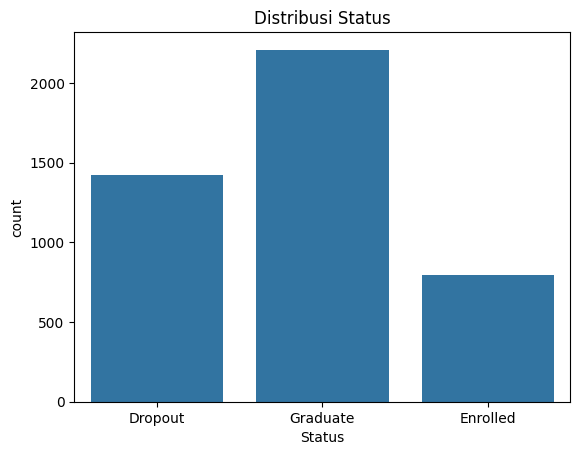

In [11]:
sns.countplot(x='Status', data=df)
plt.title('Distribusi Status')
plt.show()

# **Data Preparation / Preprocessing**

## Split Feature and Target Variables

In [12]:
X = df.drop('Status', axis=1)
y = df['Status']

## Splitting data to Training and Test Set

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Features Standardization

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Modeling**

## Making a RandomForest Model

In [15]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Predicting Value of the Testing Set

In [16]:
y_pred = model.predict(X_test)

In [17]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[347  28  66]
 [ 71  65 109]
 [ 19  29 594]]

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.79      0.79      0.79       441
    Enrolled       0.53      0.27      0.35       245
    Graduate       0.77      0.93      0.84       642

    accuracy                           0.76      1328
   macro avg       0.70      0.66      0.66      1328
weighted avg       0.74      0.76      0.73      1328


Accuracy Score:
0.7575301204819277


## Saving the Model and Scaler

In [18]:
dump(model, 'model.joblib')
dump(scaler, 'scaler.joblib')

['scaler.joblib']

# **Evaluation**

## Most Important Features compared to the target Feature Visualization

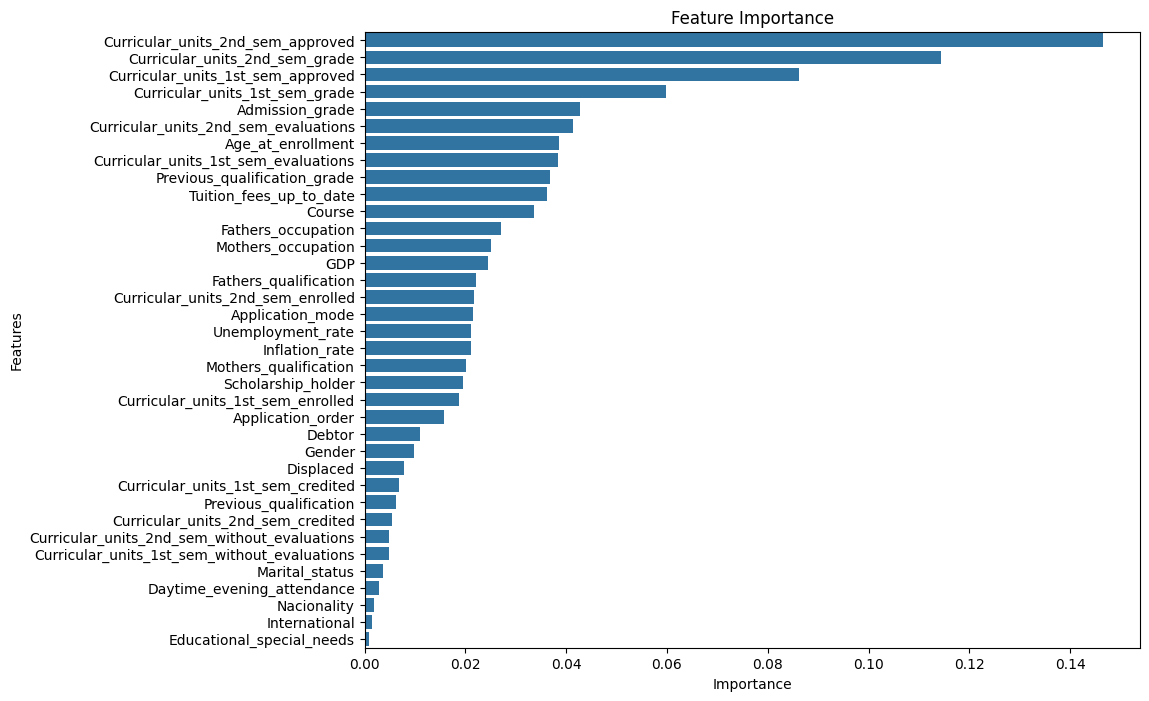

In [19]:
# Melihat feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## Box plot between Status and the Features

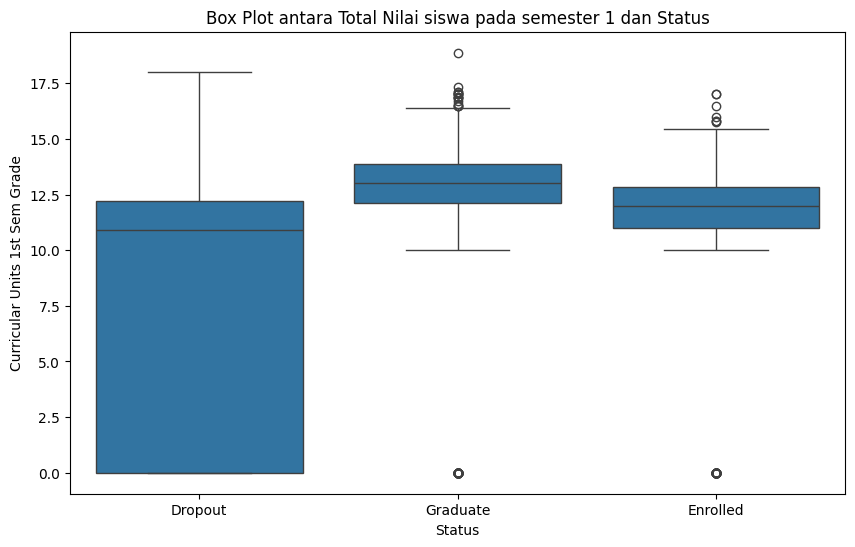

In [20]:
# Box plot antara Status dan Curricular_units_1st_sem_grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Curricular_units_1st_sem_grade', data=df)
plt.title('Box Plot antara Total Nilai siswa pada semester 1 dan Status')
plt.xlabel('Status')
plt.ylabel('Curricular Units 1st Sem Grade')
plt.show()

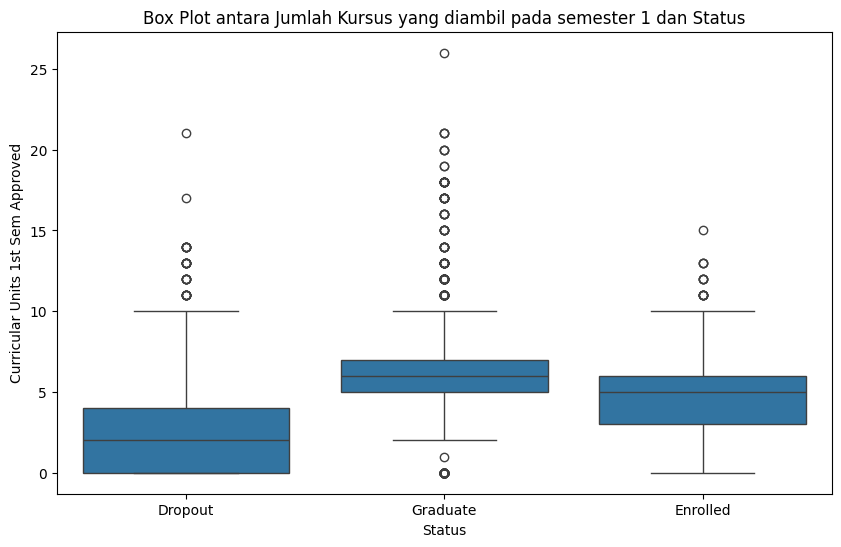

In [21]:
# Box plot antara Status dan Curricular_units_1st_sem_approved
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Curricular_units_1st_sem_approved', data=df)
plt.title('Box Plot antara Jumlah Kursus yang diambil pada semester 1 dan Status')
plt.xlabel('Status')
plt.ylabel('Curricular Units 1st Sem Approved')
plt.show()

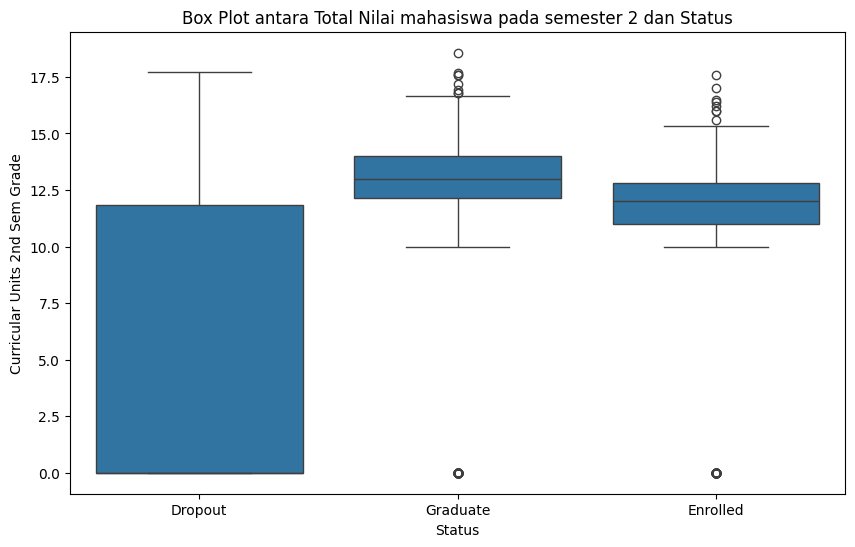

In [22]:
# Box plot antara Status dan Curricular_units_2nd_sem_grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Curricular_units_2nd_sem_grade', data=df)
plt.title('Box Plot antara Total Nilai mahasiswa pada semester 2 dan Status')
plt.xlabel('Status')
plt.ylabel('Curricular Units 2nd Sem Grade')
plt.show()

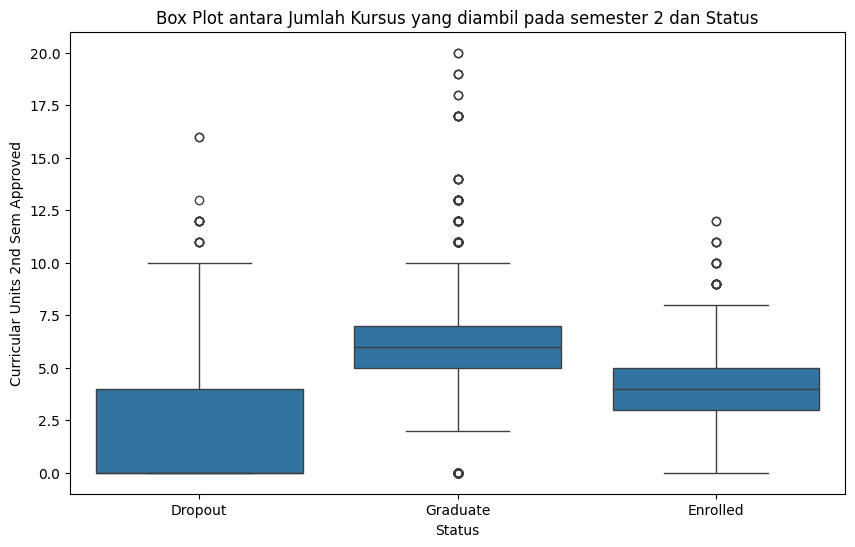

In [23]:
# Box plot antara Status dan Curricular_units_2nd_sem_approved
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Curricular_units_2nd_sem_approved', data=df)
plt.title('Box Plot antara Jumlah Kursus yang diambil pada semester 2 dan Status')
plt.xlabel('Status')
plt.ylabel('Curricular Units 2nd Sem Approved')
plt.show()

## Loading the Random Forest Model

In [24]:
model_loaded = load('model.joblib')

## Making an Example Data for Model Testing

In [25]:
data_baru = pd.DataFrame({
    'Marital_status': [1],  # single
    'Application_mode': [1],  # 1st phase - general contingent
    'Application_order': [0],  # first choice
    'Course': [9130],  # Equinculture
    'Daytime_evening_attendance': [1],  # daytime
    'Previous_qualification': [1],  # Secondary education
    'Previous_qualification_grade': [150],  # example grade
    'Nacionality': [1],  # Portuguese
    'Mothers_qualification': [1],  # Secondary Education - 12th Year of Schooling or Eq.
    'Fathers_qualification': [1],  # Secondary Education - 12th Year of Schooling or Eq.
    'Mothers_occupation': [4],  # Administrative staff
    'Fathers_occupation': [3],  # Intermediate Level Technicians and Professions
    'Admission_grade': [160],  # example admission grade
    'Displaced': [0],  # no
    'Educational_special_needs': [0],  # no
    'Debtor': [0],  # no
    'Tuition_fees_up_to_date': [1],  # yes
    'Gender': [1],  # male
    'Scholarship_holder': [0],  # no
    'Age_at_enrollment': [20],  # example age
    'International': [0],  # no
    'Curricular_units_1st_sem_credited': [0],  # example value
    'Curricular_units_1st_sem_enrolled': [5],  # example value
    'Curricular_units_1st_sem_evaluations': [3],  # example value
    'Curricular_units_1st_sem_approved': [3],  # example value
    'Curricular_units_1st_sem_grade': [2.5],  # example grade
    'Curricular_units_1st_sem_without_evaluations': [0],  # example value
    'Curricular_units_2nd_sem_credited': [0],  # example value
    'Curricular_units_2nd_sem_enrolled': [3],  # example value
    'Curricular_units_2nd_sem_evaluations': [3],  # example value
    'Curricular_units_2nd_sem_approved': [3],  # example value
    'Curricular_units_2nd_sem_grade': [2.5],  # example grade
    'Curricular_units_2nd_sem_without_evaluations': [0],  # example value
    'Unemployment_rate': [5.5],  # example rate
    'Inflation_rate': [1.2],  # example rate
    'GDP': [20000]  # example GDP
})

## **Prediksi Pada Data Siswa Baru (Example data yang sebelumnya sudah kita buat)**

In [26]:
# Standarisasi fitur pada data baru
data_baru = scaler.transform(data_baru)

# Memprediksi hasil untuk data baru
prediksi_baru = model_loaded.predict(data_baru)

print("Prediction Value for the Data Given:", prediksi_baru)

Prediction Value for the Data Given: ['Dropout']
